In [1]:
# Power and sample size calculation
# For Microbiome studies

# Following this publication for Power Calculation
# https://www.nature.com/articles/s41385-022-00548-1

# By: Ashok K. Sharma
# Date: 09-23-2024

In [2]:
# Type1: Comparison of two means in normally distributed continuous data
#Standard formulae
#Comparison of two means in normally distributed continuous data
#If the two groups contain the same number of samples, the required sample size per group can be calculated as14:
#n 1⁄4 2
#Δ2
#2ðZ1α þZ1βÞ2
#; Equation A
#where:
#• n = the required sample size in each group
#μμ
#• Δ = 1 2 ; is the effect size, where μ and μ are two populations means and σ is the common
#σ12 variance, σ1 = σ2 = σ
#• Z1  α ; Z1  β are the upper tail normal quantiles associated with the desired type I and type II errors, α and β, respectively.
#If the two groups are not equally sized, then let parameter r denote the ratio of the number of individuals in the larger group divided by the number of individuals in the smaller group. The sample size of the smaller group for a two-sided Z test is given as follows:
#n2 1⁄4rþ1 2 rΔ
#;
#ðZ1α þZ1βÞ2
#2
#and the sample size for the larger group,
#n1 1⁄4 r n2; Equation B

Sample Sizes for Equal Group Sizes (Effect Size | Sample Size):
Effect Size 0.2: 393 per group
Effect Size 0.5: 63 per group
Effect Size 0.8: 25 per group

Sample Sizes for Unequal Group Sizes (Effect Size | Ratio | Group 1 Size | Group 2 Size):
Effect Size 0.2, Ratio 1.0: Group 1 = 393, Group 2 = 393
Effect Size 0.2, Ratio 2.0: Group 1 = 590, Group 2 = 295
Effect Size 0.2, Ratio 3.0: Group 1 = 786, Group 2 = 262
Effect Size 0.5, Ratio 1.0: Group 1 = 63, Group 2 = 63
Effect Size 0.5, Ratio 2.0: Group 1 = 96, Group 2 = 48
Effect Size 0.5, Ratio 3.0: Group 1 = 126, Group 2 = 42
Effect Size 0.8, Ratio 1.0: Group 1 = 25, Group 2 = 25
Effect Size 0.8, Ratio 2.0: Group 1 = 38, Group 2 = 19
Effect Size 0.8, Ratio 3.0: Group 1 = 51, Group 2 = 17


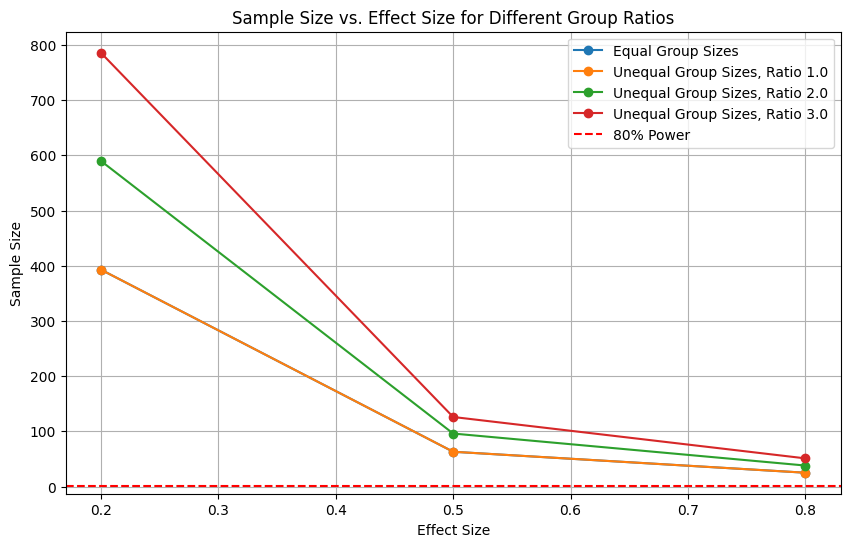

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to calculate sample size for two-sided Z-test (equal group sizes)
def sample_size_equal_groups(effect_size, std_dev, alpha=0.05, power=0.8):
    # Z-scores for alpha and power
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    
    # Sample size calculation (Equation A)
    sample_size = (2 * std_dev**2 * (Z_alpha + Z_beta)**2) / effect_size**2
    return int(np.ceil(sample_size))  # Round up to next whole number

# Function to calculate sample size for two-sided Z-test (unequal group sizes)
def sample_size_unequal_groups(effect_size, std_dev, r, alpha=0.05, power=0.8):
    # Z-scores for alpha and power
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    
    # Sample size for the smaller group (n2) (Equation B)
    n2 = ((r + 1) * std_dev**2 * (Z_alpha + Z_beta)**2) / (r * effect_size**2)
    n2 = int(np.ceil(n2))  # Round up to next whole number
    
    # Sample size for the larger group (n1)
    n1 = int(np.ceil(r * n2))  # Larger group size
    
    return n1, n2

# Define parameters
effect_sizes = [0.2, 0.5, 0.8]  # Small, medium, large effect sizes
std_dev = 1.0  # Standard deviation (assume same for both groups)
alpha = 0.05  # Type I error rate
power = 0.8  # Desired power (80%)

# Store sample sizes for plotting
sample_sizes_equal = {}
sample_sizes_unequal = {}

# Ratios for unequal groups
ratios = [1.0, 2.0, 3.0]  # r values

# Calculate sample sizes for equal group sizes
for es in effect_sizes:
    sample_sizes_equal[es] = sample_size_equal_groups(es, std_dev, alpha, power)

# Calculate sample sizes for unequal group sizes
for es in effect_sizes:
    for r in ratios:
        sample_sizes_unequal[(es, r)] = sample_size_unequal_groups(es, std_dev, r, alpha, power)

# Print the results
print("Sample Sizes for Equal Group Sizes (Effect Size | Sample Size):")
for es in sample_sizes_equal:
    print(f"Effect Size {es}: {sample_sizes_equal[es]} per group")

print("\nSample Sizes for Unequal Group Sizes (Effect Size | Ratio | Group 1 Size | Group 2 Size):")
for es, r in sample_sizes_unequal:
    n1, n2 = sample_sizes_unequal[(es, r)]
    print(f"Effect Size {es}, Ratio {r}: Group 1 = {n1}, Group 2 = {n2}")

# Plot sample sizes vs effect size
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, [sample_sizes_equal[es] for es in effect_sizes], label="Equal Group Sizes", marker='o')

for r in ratios:
    plt.plot(effect_sizes, [sample_sizes_unequal[(es, r)][0] for es in effect_sizes], 
             label=f"Unequal Group Sizes, Ratio {r}", marker='o')

plt.title('Sample Size vs. Effect Size for Different Group Ratios')
plt.xlabel('Effect Size')
plt.ylabel('Sample Size')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Basic Power Calculation:
#- Microbime data (Diversity Only)
#- With fixed Effect Size - computed on microbiome Data (with Equal and Unequal Number of Samples)

Effect Size (absolute): 0.3726399879855929
Equal group sizes detected. Using Equation A.
Z_alpha: 1.959963984540054, Z_beta: 0.0
Effect Size: 0.3726399879855929
Standard Deviation: 0.8767175041368992
Numerator: 5.905348507372477
Denominator: 0.13886056064590283
Z_alpha: 1.959963984540054, Z_beta: 0.12566134685507416
Effect Size: 0.3726399879855929
Standard Deviation: 0.8767175041368992
Numerator: 6.686855475596986
Denominator: 0.13886056064590283
Z_alpha: 1.959963984540054, Z_beta: 0.25334710313580006
Effect Size: 0.3726399879855929
Standard Deviation: 0.8767175041368992
Numerator: 7.530681326320709
Denominator: 0.13886056064590283
Z_alpha: 1.959963984540054, Z_beta: 0.385320466407568
Effect Size: 0.3726399879855929
Standard Deviation: 0.8767175041368992
Numerator: 8.455521521165661
Denominator: 0.13886056064590283
Z_alpha: 1.959963984540054, Z_beta: 0.5244005127080413
Effect Size: 0.3726399879855929
Standard Deviation: 0.8767175041368992
Numerator: 9.488115864959166
Denominator: 0.138

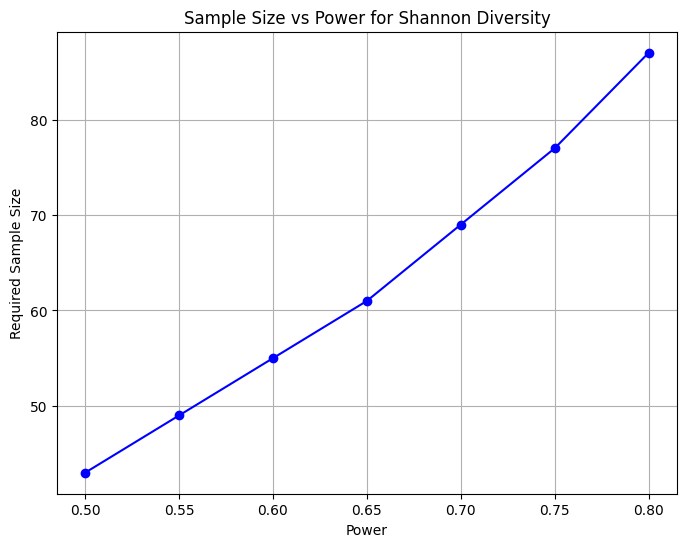

Power: 0.50, Sample Size: 43
Power: 0.55, Sample Size: 49
Power: 0.60, Sample Size: 55
Power: 0.65, Sample Size: 61
Power: 0.70, Sample Size: 69
Power: 0.75, Sample Size: 77
Power: 0.80, Sample Size: 87


In [4]:
#Comparison of two means in normally distributed continuous data (Extremely Important)
# Power calculation on Diversity Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the microbiome diversity data from CSV
data = pd.read_csv('../data/Richness_total_Equal.csv') # Equal number of samples in Both Groups
#data = pd.read_csv('Richness_total.csv') # Unequal number of samples in both Groups

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split data into cases and controls
case_data = diversity_data[data['Group'] == 'Cases']
control_data = diversity_data[data['Group'] == 'Controls']

############################################## Functions ############################
# Function to calculate effect size
def calculate_effect_size(case_data, control_data):
    mean_diff = np.mean(case_data) - np.mean(control_data)
    pooled_std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)
    if pooled_std_dev == 0:
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev

# Function to calculate sample size based on Equation A (equal group sizes)
def sample_size_equal_groups(effect_size, std_dev, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    # Print Z-scores to debug overflow issues
    print(f"Z_alpha: {Z_alpha}, Z_beta: {Z_beta}")

    # Check if Z_beta is too large, which might cause overflow
    if np.isnan(Z_beta) or Z_beta == np.inf:
        print("Z_beta is too large or resulted in NaN, skipping this power level.")
        return np.nan
        
    numerator = 2 * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = effect_size ** 2

    # Debugging print statements (after variables are defined)
    print(f"Effect Size: {effect_size}")
    print(f"Standard Deviation: {std_dev}")
    #print(f"Ratio: {ratio}") # There is no need to ratio in this formula because its a Equal Sample Size
    print(f"Numerator: {numerator}")
    print(f"Denominator: {denominator}")

    # Check if denominator is valid
    if denominator == 0 or np.isnan(denominator):
        print("Denominator is invalid (division by zero or NaN). Check the input values.")
        return np.nan  # Return NaN if denominator is invalid
    
    return int(np.ceil(numerator / denominator))

# Function to calculate sample size based on Equation B (unequal group sizes)
def sample_size_unequal_groups(effect_size, std_dev, ratio, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    
    # Print Z-scores to debug overflow issues
    print(f"Z_alpha: {Z_alpha}, Z_beta: {Z_beta}")
    
    # Check if Z_beta is too large, which might cause overflow
    if np.isnan(Z_beta) or Z_beta == np.inf:
        print("Z_beta is too large or resulted in NaN, skipping this power level.")
        return np.nan

    numerator = (ratio + 1) * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = ratio * effect_size ** 2
    
    # Debugging print statements (after variables are defined)
    print(f"Effect Size: {effect_size}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Ratio: {ratio}")
    print(f"Numerator: {numerator}")
    print(f"Denominator: {denominator}")
    
    # Check if denominator is valid
    if denominator == 0 or np.isnan(denominator):
        print("Denominator is invalid (division by zero or NaN). Check the input values.")
        return np.nan  # Return NaN if denominator is invalid
    
    n2 = int(np.ceil(numerator / denominator))  # Sample size of the smaller group
    n1 = int(ratio * n2)  # Sample size of the larger group
    return n1, n2
####################################

# Calculate effect size using diversity column
effect_size = calculate_effect_size(case_data, control_data)

# Use absolute value of effect size to avoid negative values
effect_size = abs(effect_size)

# Check if the effect size is valid
if np.isnan(effect_size):
    print("Invalid effect size (NaN). Check your data.")
else:
    print(f"Effect Size (absolute): {effect_size}")

# Assuming standard deviation is pooled between cases and controls
std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)

# Check if the groups are equal or unequal in size
n_case = len(case_data)
n_control = len(control_data)

if n_case == n_control:
    print("Equal group sizes detected. Using Equation A.")
    sample_size_func = sample_size_equal_groups
else:
    print(f"equal group sizes detected (Case: {n_case}, Control: {n_control}). Using Equation B.")
    ratio = max(n_case, n_control) / min(n_case, n_control)
    sample_size_func = lambda es, sd, alpha, power: sample_size_unequal_groups(es, sd, ratio, alpha, power)

# Define power levels and significance level
power_levels = np.arange(0.5, 0.8, 0.05)  # Power levels from 0.7 to 0.95
alpha = 0.05

# Calculate sample sizes for different power levels
sample_sizes = []
for power in power_levels:
    sample_size = sample_size_func(effect_size, std_dev, alpha, power)
    if isinstance(sample_size, tuple):
        sample_sizes.append(max(sample_size))  # Use the larger sample size when unequal
    elif np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power}")
        sample_sizes.append(np.nan)
    else:
        sample_sizes.append(sample_size)

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title(f'Sample Size vs Power for {column_name} Diversity')
plt.xlabel('Power')
plt.ylabel('Required Sample Size')
plt.grid(True)
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Sample Size: {sample_size}")

Effect Size (absolute): -0.22270256896578355


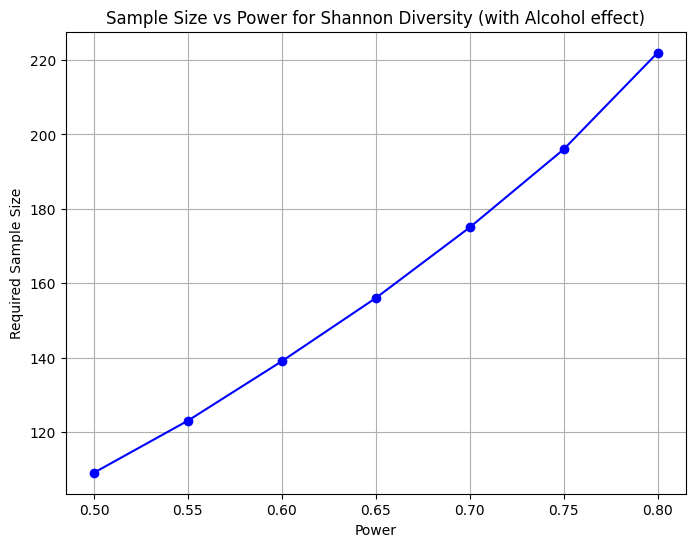

Power: 0.50, Sample Size: 109
Power: 0.55, Sample Size: 123
Power: 0.60, Sample Size: 139
Power: 0.65, Sample Size: 156
Power: 0.70, Sample Size: 175
Power: 0.75, Sample Size: 196
Power: 0.80, Sample Size: 222


In [5]:
# Stratified Analysis to include the Secondary Group (If it's Binary)

#To account for the secondary factor (like Alcohol in your case) while comparing two primary groups (e.g., Cases and Controls based on Group), you can perform a stratified analysis or include the secondary group as an interaction term in your calculations. This can be done by adjusting the effect size calculation based on the Alcohol group.
#Here’s how you can modify the existing code to include the Alcohol group as a potential confounding factor:

#Modifications:
#Stratify the Data by Alcohol: You can split the data by both Group (Cases vs Controls) and Alcohol (e.g., Yes vs No) to ensure you're comparing groups with similar alcohol consumption.
#Calculate Effect Size for Each Alcohol Group: Calculate the effect size for each subgroup (Alcohol = Yes and Alcohol = No) and then combine these effect sizes.
#Pooled Standard Deviation Across Alcohol Groups: Adjust the standard deviation calculation for the two groups by including the Alcohol group.
#Here’s the modified version of the code:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the microbiome diversity data
#data = pd.read_csv('Richness_total_Equal.csv')  # Equal number of samples
data = pd.read_csv('../data/Richness_total.csv')  # Unequal number of samples
data['Alcohol'] = data['Alcohol'].apply(lambda x: 'No' if x == 'Never' else 'Yes')

# Select the columns for diversity, Group, and Alcohol
column_name = 'Shannon'  # Diversity column
group_column = 'Group'   # Group: 'Cases' or 'Controls'
alcohol_column = 'Alcohol'  # Alcohol: 'Yes' or 'No'

# Stratify data by Group (Cases, Controls) and Alcohol (Yes, No)
case_alcohol_yes = data[(data[group_column] == 'Cases') & (data[alcohol_column] == 'Yes')][column_name]
control_alcohol_yes = data[(data[group_column] == 'Controls') & (data[alcohol_column] == 'Yes')][column_name]
case_alcohol_no = data[(data[group_column] == 'Cases') & (data[alcohol_column] == 'No')][column_name]
control_alcohol_no = data[(data[group_column] == 'Controls') & (data[alcohol_column] == 'No')][column_name]

############################################## Functions ############################
# Function to calculate effect size
def calculate_effect_size(case_data, control_data):
    mean_diff = np.mean(case_data) - np.mean(control_data)
    pooled_std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)
    if pooled_std_dev == 0:
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev

# Function to calculate sample size (equal group sizes)
def sample_size_equal_groups(effect_size, std_dev, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    
    numerator = 2 * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = effect_size ** 2
    
    if denominator == 0 or np.isnan(denominator):
        return np.nan  # Return NaN if denominator is invalid
    
    return int(np.ceil(numerator / denominator))

# Function to calculate sample size based on Equation B (unequal group sizes)
def sample_size_unequal_groups(effect_size, std_dev, ratio, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    
    # Print Z-scores to debug overflow issues
    print(f"Z_alpha: {Z_alpha}, Z_beta: {Z_beta}")
    
    # Check if Z_beta is too large, which might cause overflow
    if np.isnan(Z_beta) or Z_beta == np.inf:
        print("Z_beta is too large or resulted in NaN, skipping this power level.")
        return np.nan

    numerator = (ratio + 1) * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = ratio * effect_size ** 2
    
    # Debugging print statements (after variables are defined)
    print(f"Effect Size: {effect_size}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Ratio: {ratio}")
    print(f"Numerator: {numerator}")
    print(f"Denominator: {denominator}")
    
    # Check if denominator is valid
    if denominator == 0 or np.isnan(denominator):
        print("Denominator is invalid (division by zero or NaN). Check the input values.")
        return np.nan  # Return NaN if denominator is invalid
    
    n2 = int(np.ceil(numerator / denominator))  # Sample size of the smaller group
    n1 = int(ratio * n2)  # Sample size of the larger group
    return n1, n2
################################################

# Calculate effect size for Alcohol = Yes and Alcohol = No
effect_size_yes = calculate_effect_size(case_alcohol_yes, control_alcohol_yes)
effect_size_no = calculate_effect_size(case_alcohol_no, control_alcohol_no)

# Take the average effect size or pool it as needed
effect_size = np.nanmean([effect_size_yes, effect_size_no])

# Pooled standard deviation for both alcohol groups
std_dev_yes = np.sqrt((np.var(case_alcohol_yes) + np.var(control_alcohol_yes)) / 2)
std_dev_no = np.sqrt((np.var(case_alcohol_no) + np.var(control_alcohol_no)) / 2)
pooled_std_dev = np.nanmean([std_dev_yes, std_dev_no])

# Check if the effect size is valid
if np.isnan(effect_size):
    print("Invalid effect size (NaN). Check your data.")
else:
    print(f"Effect Size (absolute): {effect_size}")

# Check if groups are equal in size
n_case = len(data[data[group_column] == 'Cases'])
n_control = len(data[data[group_column] == 'Controls'])

# Sample size calculation for equal groups
alpha = 0.05
power_levels = np.arange(0.5, 0.8, 0.05)  # Power levels from 0.5 to 0.8
sample_sizes = []

for power in power_levels:
    sample_size = sample_size_equal_groups(effect_size, pooled_std_dev, alpha, power)
    sample_sizes.append(sample_size)

# Plot the sample sizes vs power
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title(f'Sample Size vs Power for {column_name} Diversity (with Alcohol effect)')
plt.xlabel('Power')
plt.ylabel('Required Sample Size')
plt.grid(True)
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Sample Size: {sample_size}")

In [6]:
data.shape

(51, 13)

Effect size is too small: -1.1783181299172462e-16. Setting to minimum detectable value.
Effect Size (absolute): 0.01
Standard Deviation: 0.8636924217666078
Equal group sizes detected. Using Equation A.
Sample size too large for power: 0.7500000000000002. Possible issue with effect size.
Sample size too large for power: 0.8000000000000003. Possible issue with effect size.


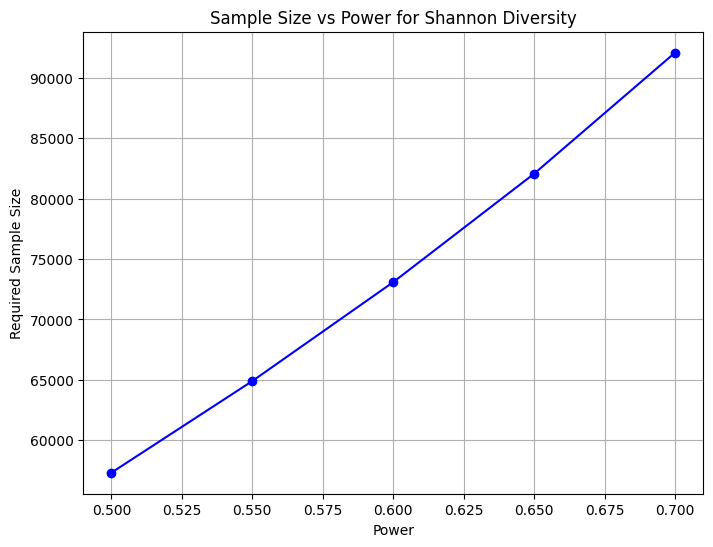

Power: 0.50, Sample Size: 57312
Power: 0.55, Sample Size: 64897
Power: 0.60, Sample Size: 73086
Power: 0.65, Sample Size: 82062
Power: 0.70, Sample Size: 92083
Power: 0.75, Sample Size: nan
Power: 0.80, Sample Size: nan


In [11]:
# If the Secondary Factor is a Continous Variable Instead of binary:
# Here in this example case - Its "HPB_pmol_mg_DNA"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

# Load the microbiome diversity data from CSV
data = pd.read_csv('../data/Richness_total_Equal.csv')  # Equal number of samples in Both Groups

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split data into cases and controls
case_data = data[data['Group'] == 'Cases'][[column_name, 'HPB_pmol_mg_DNA']]
control_data = data[data['Group'] == 'Controls'][[column_name, 'HPB_pmol_mg_DNA']]

# Perform regression of diversity on HPB_pmol_mg_DNA for both cases and controls
def adjust_for_covariate(group_data, covariate_name, outcome_name):
    X = group_data[[covariate_name]].values.reshape(-1, 1)  # Covariate (HPB_pmol_mg_DNA)
    y = group_data[outcome_name].values  # Diversity column (Shannon or Observed)
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Get residuals (y - predicted y), which adjust for the covariate
    residuals = y - model.predict(X)
    
    return residuals

# Adjusting both case and control groups for HPB_pmol_mg_DNA
case_residuals = adjust_for_covariate(case_data, 'HPB_pmol_mg_DNA', column_name)
control_residuals = adjust_for_covariate(control_data, 'HPB_pmol_mg_DNA', column_name)

# Function to calculate effect size using residuals
def calculate_effect_size(case_residuals, control_residuals):
    mean_diff = np.mean(case_residuals) - np.mean(control_residuals)
    pooled_std_dev = np.sqrt((np.var(case_residuals) + np.var(control_residuals)) / 2)
    
    if np.isclose(pooled_std_dev, 0):
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev


# Function to calculate sample size (equal group sizes)
def sample_size_equal_groups(effect_size, std_dev, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    
    numerator = 2 * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = effect_size ** 2
    
    if denominator == 0 or np.isnan(denominator):
        return np.nan  # Return NaN if denominator is invalid
    
    return int(np.ceil(numerator / denominator))

# Calculate effect size using residuals
effect_size = calculate_effect_size(case_residuals, control_residuals)

# Sanity check for effect size
if effect_size < 0.01:
    print(f"Effect size is too small: {effect_size}. Setting to minimum detectable value.")
    effect_size = 0.01  # Set a minimum threshold for the effect size

# Print the effect size for debugging
print(f"Effect Size (absolute): {effect_size}")

# Assuming standard deviation is pooled between cases and controls
std_dev = np.sqrt((np.var(case_residuals) + np.var(control_residuals)) / 2)

# Print standard deviation
print(f"Standard Deviation: {std_dev}")

# Check if the groups are equal or unequal in size
n_case = len(case_data)
n_control = len(control_data)

if n_case == n_control:
    print("Equal group sizes detected. Using Equation A.")
    sample_size_func = sample_size_equal_groups
else:
    print(f"Unequal group sizes detected (Case: {n_case}, Control: {n_control}). Using Equation B.")
    ratio = max(n_case, n_control) / min(n_case, n_control)
    sample_size_func = lambda es, sd, alpha, power: sample_size_unequal_groups(es, sd, ratio, alpha, power)

# Define power levels and significance level
power_levels = np.arange(0.5, 0.8, 0.05)  # Power levels from 0.7 to 0.95
alpha = 0.05

# Calculate sample sizes for different power levels
sample_sizes = []
for power in power_levels:
    sample_size = sample_size_func(effect_size, std_dev, alpha, power)
    
    if sample_size > 100000:
        print(f"Sample size too large for power: {power}. Possible issue with effect size.")
        sample_sizes.append(np.nan)
    else:
        sample_sizes.append(sample_size)

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title(f'Sample Size vs Power for {column_name} Diversity')
plt.xlabel('Power')
plt.ylabel('Required Sample Size')
plt.grid(True)
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Sample Size: {sample_size}")
